<a href="https://colab.research.google.com/github/adsk2050/btp-iitg/blob/master/bar_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np


class Node:
    x=0
    def __init__(self, x):
        self.x=x

    def set_value(self, value):
        self.value=value

class Element:
    #linear element
    def __init__(self, a, b):
        self.a=a
        self.b=b
    def __str__(self):
        return "First node  at: "+str(self.a.x)+", Second node at: "+str(self.b.x)

class Force:
    #in newtons
    def __init__(self, m, d):
        self.magnitude=m
        self.direction=d

class Bar:
    length=1
    elements=2
    nodes=[]
    element_list=[]
    def __init__(self, l, e):
        self.length=l
        self.elements=e
        self.create_nodes()
        self.create_elements()

    def create_nodes(self):
        al=np.linspace(0, self.length-1, int(self.elements+1))
        for i in al:
            new_node=Node(i)
            self.nodes.append(new_node)

    def create_elements(self):
        for i in range(0, self.elements):
            new_element = Element(self.nodes[i], self.nodes[i+1])
            self.element_list.append(new_element)

b=Bar(10, 5)
# for e in b.element_list:
#     print(e)
# # print(b.element_list)
# # print(b.nodes)

First node  at: 0.0, Second node at: 1.8
First node  at: 1.8, Second node at: 3.6
First node  at: 3.6, Second node at: 5.4
First node  at: 5.4, Second node at: 7.2
First node  at: 7.2, Second node at: 9.0


In [0]:
import numpy as np
lm=10
l=10
al=np.linspace(0, l-1, int(lm))
print(al)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


**From Dorival Neto**
FEM - A 1D Finite Element Method Code to be used as basis for DGFEM creation
Copyright (C) 2016 Dorival Piedade Neto & Sergio Persival Baroncini Proença

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

Adjusted to work with python 3


[[   1.    0.    0.    0.]
 [   0.  200. -100.    0.]
 [   0. -100.  200. -100.]
 [   0.    0. -100.  100.]] [0. 0. 0. 1.]
Displacement at nodes
 Node #     displacement
     0        0.000000
     1        0.010000
     2        0.020000
     3        0.030000


Normal force at elements
 Element #   Normal node i    Normal node j
    0          1.00000          1.00000
    1          1.00000          1.00000
    2          1.00000          1.00000


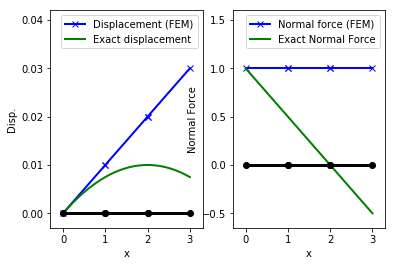

In [0]:
import numpy as np
# from numpy import zeros, array, dot, linspace
from numpy.linalg import solve
import matplotlib.pyplot as plt

class Node(object):

    def __init__(self, index, coord):
        self._index = index
        self._coord = coord
        self._disp = 0.0

    def __repr__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    def __str__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    @property
    def index(self):
        return self._index

    @property
    def coord(self):
        return self._coord

    @coord.setter
    def coord(self, value):
        self._coord = value

    @property
    def displacement(self):
        return self._disp

    @displacement.setter
    def displacement(self, value):
        self._disp = value

class Imposed_displacement(object):

    def __init__(self, node_number, value):
        self._node_number = node_number
        self._value = value

    @property
    def node_number(self):
        return self._node_number

    @node_number.setter
    def node_number(self, number):
        self._node_number = number

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, val):
        self._value = val

class Force(object):

    def __init__(self, node_number, value):
        self._node_number = node_number
        self._value = value

    @property
    def node_number(self):
        return self._node_number

    @node_number.setter
    def node_number(self, number):
        self._node_number = number

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, val):
        self._value = val

class Pressure(object):

    def __init__(self, element_number, values):
        self._element_number = element_number
        self._values = values

    @property
    def element_number(self):
        return self._element_number

    @element_number.setter
    def element_number(self, number):
        self._element_number = number

    @property
    def values(self):
        return self._values

    @values.setter
    def values(self, val):
        self._values = val


class Element(object):

    def __init__(self, index, nodes, ES):
        self._index = index
        self._nodes = nodes
        self._ES = ES

    def __str__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    def __repr__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    @property
    def index(self):
        return self._index

    @property
    def nodes(self):
        return self._nodes

    @nodes.setter
    def nodes(self, nds):
        self._nodes = nds

    @property
    def ES(self):
        return self._ES

    @ES.setter
    def ES(self, value):
        self._ES = value

    def lenght(self):
        n0, n1 = self._nodes
        x0 = n0.coord
        x1 = n1.coord
        return x1 - x0

    def stiffness_matrix(self):
        ES = self.ES
        L = self.lenght()
        kl = ES / L * np.array([[1.0,-1.0],[-1.0,1.0]])
        return kl

    def force_vector(self, values):
        pi, pj = values
        L = self.lenght()
        f = np.array([(2.0*pi+pj)*L/6.0, (pi+2.0*pj)*L/6.0])
        return  f

    def indexes(self):
        ni, nj = self._nodes
        nni = ni.index
        nnj = nj.index
        return (nni, nnj)

    def normal_force(self):
        ni, nj = self._nodes
        xi = ni.coord; xj = nj.coord
        di = ni.displacement; dj = nj.displacement
        ES = self._ES
        N = ES * (dj - di) / (xj -xi)
        return N

class Structure(object):

    def __init__(self):
        self._nodes = {}
        self._elements = {}
        self._forces = []
        self._imposed_displacements = []
        self._pressures = []

    def insert_node(self, index, coord):
        self._nodes[index] = Node(index,coord)

    def insert_element(self, index, nodes, ES):
        nni, nnj = nodes  # Indexes
        ni = self._nodes[nni]
        nj = self._nodes[nnj]
        self._elements[index] = Element(index, [ni, nj], ES)

    def apply_pressure(self, element_number, values):
        self._pressures.append(Pressure(element_number, values))

    def apply_force(self, node_number, value):
        self._forces.append(Force(node_number,value))

    def apply_imposed_displacement(self, node_number, value):
        self._imposed_displacements.append(Imposed_displacement(node_number, value))

    def solve_system_of_equation(self):
        ndof = len(self._nodes)
        kg = np.zeros((ndof,ndof))
        fg = np.zeros(ndof)

        # local matrices
        for element in self._elements.values(): # self._elements is a dictonary
            ni, nj = element.indexes()
            row = np.array((ni,ni,nj,nj))
            col = np.array((ni,nj,ni,nj))
            lrow = np.array((0,0,1,1))
            lcol = np.array((0,1,0,1))
            kl = element.stiffness_matrix()
            kg[row, col] += kl[lrow,lcol]

        # local vector - pressures
        for pressure in self._pressures:
            element_number = pressure.element_number
            values = pressure.values
            element = self._elements[element_number]
            indexes = element.indexes()
            fl = element.force_vector(values)
            indexes = np.array(indexes)
            fg[indexes] += fl[:]

        # local vector - forces
        for force in self._forces:
            node_number = force.node_number
            value = force.value
            fg[node_number] += value

        # displacement boundary condition
        self.impose_displacement_boundary_conditions(kg,fg)
       
        # solving the system of equation
        sol = solve(kg,fg)
        self.update_degrees_of_freedom(sol)


    def impose_displacement_boundary_conditions(self,kg,fg):
        for imp_disp in self._imposed_displacements:
            nn = imp_disp.node_number
            value = imp_disp.value
            fg -= kg[nn,:] * value
            kg[nn,:] = 0.0
            kg[:,nn] = 0.0
            kg[nn,nn] = 1.0
            fg[nn] = value
            print (kg, fg)

    def update_degrees_of_freedom(self, sol):   
        for node in self._nodes.values():
            index = node.index
            node.displacement = sol[index]

    def print_results(self):
        print ('Displacement at nodes')
        print (' Node #     displacement')
        for ni in sorted(self._nodes.keys()):
            node = self._nodes[ni]
            disp = node.displacement
            print ('     %d        %.6f'%(ni,disp))
        print ('\n')
        print ('Normal force at elements')
        print (' Element #   Normal node i    Normal node j')
        for ei in sorted(self._elements.keys()):
            element = self._elements[ei]
            Ni = element.normal_force()
            Nj = Ni
            print ('    %d          %.5f          %.5f'%(ei,Ni,Nj))

    def plot_results(self, exact_disp = None, exact_N = None):
        xs = []
        ys = []
        disps = []
        Ns = []
        for ind in sorted(self._elements.keys()):
            element = self._elements[ind]
            ni, nj = element.nodes
            xi = ni.coord; di = ni.displacement
            xj = nj.coord; dj = nj.displacement
            N = element.normal_force()
            xs += [xi, xj]
            ys += [0.0, 0.0]
            disps += [di, dj]
            Ns += [N, N]
        xmin = min(xs)
        xmax = max(xs)
        dx = xmax - xmin
        if exact_disp and exact_N:
            x = np.linspace(xmin,xmax,1000)
            ed = exact_disp(x)
            eN = exact_N(x)

        fig = plt.figure(1)
        # Displacement subplot
        ax1 = fig.add_subplot(121)
        ax1.plot(xs,disps,'bx-',lw=2)
        leg1 = ['Displacement (FEM)']
        if exact_disp and exact_N:
            ax1.plot(x,ed,'g-',lw=2)
            leg1 += ['Exact displacement']
            ymin=min(ys+disps+ed.tolist())
            ymax=max(ys+disps+ed.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+disps)
            ymax=max(ys+disps)
            dy = ymax - ymin

        ax1.plot(xs,ys,'ko-',lw=3)
        ax1.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax1.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax1.set_xlabel('x')
        ax1.set_ylabel('Disp.')
        ax1.legend(leg1)

        # Displacement subplot
        ax2 = fig.add_subplot(122)
        ax2.plot(xs,Ns,'bx-',lw=2)
        leg2 = ['Normal force (FEM)']
        if exact_disp and exact_N:
            ax2.plot(x,eN,'g-',lw=2)
            leg2 += ['Exact Normal Force']
            ymin=min(ys+Ns+eN.tolist())
            ymax=max(ys+Ns+eN.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+Ns)
            ymax=max(ys+Ns)
            dy = ymax - ymin

        ax2.plot(xs,ys,'ko-',lw=3)
        ax2.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax2.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax2.set_xlabel('x')
        ax2.set_ylabel('Normal Force')
        ax2.legend(leg2)

        plt.show()

e = Structure()

e.insert_node(0,0.0)
e.insert_node(1,1.0)
e.insert_node(2,2.0)
e.insert_node(3,3.0)


e.insert_element(0,(0,1),100.0)
e.insert_element(1,(1,2),100.0)
e.insert_element(2,(2,3),100.0)

e.apply_imposed_displacement(0,0.0)
e.apply_force(3,1.0)

# e.apply_pressure(0,(0.5,0.5))
# e.apply_pressure(1,(0.5,0.5))

e.solve_system_of_equation()
e.print_results()

def exact_u(x):
    return -0.5*x**2/(2.0*100.0) + 0.5 * x * 2.0 / 100.0

def exact_N(x):
    return -0.5 * x  + 0.5 * 2.0

e.plot_results(exact_u,exact_N)

In [0]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

class Node(object):

    def __init__(self, index, coord):
        self._index = index
        self._coord = coord
        self._disp = 0.0

    def __repr__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    def __str__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    @property
    def index(self):
        return self._index

    @property
    def coord(self):
        return self._coord

    @coord.setter
    def coord(self, value):
        self._coord = value

    @property
    def displacement(self):
        return self._disp

    @displacement.setter
    def displacement(self, value):
        self._disp = value

class Force(object):

    def __init__(self, node_number, value):
        self._node_number = node_number
        self._value = value

    @property
    def node_number(self):
        return self._node_number

    @node_number.setter
    def node_number(self, number):
        self._node_number = number

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, val):
        self._value = val

class Element(object):

    def __init__(self, index, nodes, ES):
        self._index = index
        self._nodes = nodes
        self._ES = ES

    def __str__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    def __repr__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    @property
    def index(self):
        return self._index

    @property
    def nodes(self):
        return self._nodes

    @nodes.setter
    def nodes(self, nds):
        self._nodes = nds

    @property
    def ES(self):
        return self._ES

    @ES.setter
    def ES(self, value):
        self._ES = value

    def lenght(self):
        n0, n1 = self._nodes
        x0 = n0.coord
        x1 = n1.coord
        return x1 - x0

    def stiffness_matrix(self):
        ES = self.ES
        L = self.lenght()
        kl = ES / L * np.array([[1.0,-1.0],[-1.0,1.0]])
        return kl

    def force_vector(self, values):
        pi, pj = values
        L = self.lenght()
        f = np.array([(2.0*pi+pj)*L/6.0, (pi+2.0*pj)*L/6.0])
        return  f

    def indexes(self):
        ni, nj = self._nodes
        nni = ni.index
        nnj = nj.index
        return (nni, nnj)

    def normal_force(self):
        ni, nj = self._nodes
        xi = ni.coord; xj = nj.coord
        di = ni.displacement; dj = nj.displacement
        ES = self._ES
        N = ES * (dj - di) / (xj -xi)
        return N

class Structure(object):

    def __init__(self, l, e):
        self.no_elements=e
        self.length=l
        self._nodes = {}
        self._elements = {}
        self._forces = []
        self._imposed_displacements = []
        self.create_nodes()
        self.create_elements()        

    def create_nodes(self):
        al=np.linspace(0, self.length-1, int(self.no_elements+1))
        for i in range(0, len(al)):
            new_node=Node(i, al[i])
            self._nodes[i]=new_node

    def create_elements(self):
        for i in range(0, int(self.no_elements)):
            new_element = Element((self.nodes[i], self.nodes[i+1]), 0)
            self._elements[i] = new_element

    def insert_node(self, index, coord):
        self._nodes[index] = Node(index,coord)

    def insert_element(self, index, nodes, ES):
        nni, nnj = nodes  # Indexes
        ni = self._nodes[nni]
        nj = self._nodes[nnj]
        self._elements[index] = Element(index, [ni, nj], ES)

    def apply_force(self, node_number, value):
        self._forces.append(Force(node_number,value))

    def apply_imposed_displacement(self, node_number, value):
        self._imposed_displacements.append(Imposed_displacement(node_number, value))

    def solve_system_of_equation(self):
        ndof = len(self._nodes)
        kg = np.zeros((ndof,ndof))
        fg = np.zeros(ndof)

        # local matrices
        for element in self._elements.values(): # self._elements is a dictonary
            ni, nj = element.indexes()
            row = np.array((ni,ni,nj,nj))
            col = np.array((ni,nj,ni,nj))
            lrow = np.array((0,0,1,1))
            lcol = np.array((0,1,0,1))
            kl = element.stiffness_matrix()
            kg[row, col] += kl[lrow,lcol]

        # local vector - forces
        for force in self._forces:
            node_number = force.node_number
            value = force.value
            fg[node_number] += value

        # displacement boundary condition
        self.impose_displacement_boundary_conditions(kg,fg)
       
        # solving the system of equation
        sol = solve(kg,fg)
        self.update_degrees_of_freedom(sol)

    def impose_displacement_boundary_conditions(self,kg,fg):
        for imp_disp in self._imposed_displacements:
            nn = imp_disp.node_number
            value = imp_disp.value
            fg -= kg[nn,:] * value
            kg[nn,:] = 0.0
            kg[:,nn] = 0.0
            kg[nn,nn] = 1.0
            fg[nn] = value
            print(kg, fg)

    def update_degrees_of_freedom(self, sol):   
        for node in self._nodes.values():
            index = node.index
            node.displacement = sol[index]

    def print_results(self):
        print('Displacement at nodes')
        print(' Node #     displacement')
        for ni in sorted(self._nodes.keys()):
            node = self._nodes[ni]
            disp = node.displacement
            print('     %d        %.6f'%(ni,disp))
        print('\n')
        print('Normal force at elements')
        print(' Element #   Normal node i    Normal node j')
        for ei in sorted(self._elements.keys()):
            element = self._elements[ei]
            Ni = element.normal_force()
            Nj = Ni
            print('    %d          %.5f          %.5f'%(ei,Ni,Nj))

    def plot_results(self, exact_disp = None, exact_N = None):
        xs = []
        ys = []
        disps = []
        Ns = []
        for ind in sorted(self._elements.keys()):
            element = self._elements[ind]
            ni, nj = element.nodes
            xi = ni.coord; di = ni.displacement
            xj = nj.coord; dj = nj.displacement
            N = element.normal_force()
            xs += [xi, xj]
            ys += [0.0, 0.0]
            disps += [di, dj]
            Ns += [N, N]
        xmin = min(xs)
        xmax = max(xs)
        dx = xmax - xmin
        if exact_disp and exact_N:
            x = np.linspace(xmin,xmax,1000)
            ed = exact_disp(x)
            eN = exact_N(x)

        fig = plt.figure(1)
        # Displacement subplot
        ax1 = fig.add_subplot(121)
        ax1.plot(xs,disps,'bx-',lw=2)
        leg1 = ['Displacement (FEM)']
        if exact_disp and exact_N:
            ax1.plot(x,ed,'g-',lw=2)
            leg1 += ['Exact displacement']
            ymin=min(ys+disps+ed.tolist())
            ymax=max(ys+disps+ed.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+disps)
            ymax=max(ys+disps)
            dy = ymax - ymin

        ax1.plot(xs,ys,'ko-',lw=3)
        ax1.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax1.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax1.set_xlabel('x')
        ax1.set_ylabel('Disp.')
        ax1.legend(leg1)

        # Displacement subplot
        ax2 = fig.add_subplot(122)
        ax2.plot(xs,Ns,'bx-',lw=2)
        leg2 = ['Normal force (FEM)']
        if exact_disp and exact_N:
            ax2.plot(x,eN,'g-',lw=2)
            leg2 += ['Exact Normal Force']
            ymin=min(ys+Ns+eN.tolist())
            ymax=max(ys+Ns+eN.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+Ns)
            ymax=max(ys+Ns)
            dy = ymax - ymin

        ax2.plot(xs,ys,'ko-',lw=3)
        ax2.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax2.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax2.set_xlabel('x')
        ax2.set_ylabel('Normal Force')
        ax2.legend(leg2)

        plt.show()



e = Structure(100, 10)

# e.insert_node(0,0.0)
# e.insert_node(1,1.0)
# e.insert_node(2,2.0)

# e.insert_element(0,(0,1),100.0)
# e.insert_element(1,(1,2),100.0)

e.apply_imposed_displacement(0,0.0)
e.apply_force(2,1.0)

e.solve_system_of_equation()
e.print_results()

def exact_u(x):
    return -0.5*x**2/(2.0*100.0) + 0.5 * x * 2.0 / 100.0

def exact_N(x):
    return -0.5 * x  + 0.5 * 2.0

e.plot_results(exact_u,exact_N)

AttributeError: ignored

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  200. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.  200. -100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -100.  200. -100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -100.  200. -100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100.  200. -100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -100.  200. -100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -100.  200. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -100.  200. -100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -100.  200. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. -100.  200. -100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0. -100.  100.]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Displacement at nodes
 Node #     displacement
     0        

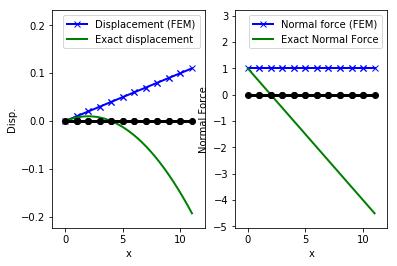

In [0]:
import numpy as np
# from numpy import zeros, array, dot, linspace
from numpy.linalg import solve
import matplotlib.pyplot as plt

class Node(object):

    def __init__(self, index, coord):
        self._index = index
        self._coord = coord
        self._disp = 0.0

    def __repr__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    def __str__(self):
        return 'Node # %d at x = %.5f'%(self._index, self._coord)

    @property
    def index(self):
        return self._index

    @property
    def coord(self):
        return self._coord

    @coord.setter
    def coord(self, value):
        self._coord = value

    @property
    def displacement(self):
        return self._disp

    @displacement.setter
    def displacement(self, value):
        self._disp = value

class Imposed_displacement(object):

    def __init__(self, node_number, value):
        self._node_number = node_number
        self._value = value

    @property
    def node_number(self):
        return self._node_number

    @node_number.setter
    def node_number(self, number):
        self._node_number = number

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, val):
        self._value = val

class Force(object):

    def __init__(self, node_number, value):
        self._node_number = node_number
        self._value = value

    @property
    def node_number(self):
        return self._node_number

    @node_number.setter
    def node_number(self, number):
        self._node_number = number

    @property
    def value(self):
        return self._value

    @value.setter
    def value(self, val):
        self._value = val

class Element(object):

    def __init__(self, index, nodes, ES):
        self._index = index
        self._nodes = nodes
        self._ES = ES

    def __str__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    def __repr__(self):
        return 'Element # %d from node # %d to node # %d, ES = %.3f'%(self._index, self._nodes[0].index, self._nodes[1].index, self._ES)

    @property
    def index(self):
        return self._index

    @property
    def nodes(self):
        return self._nodes

    @nodes.setter
    def nodes(self, nds):
        self._nodes = nds

    @property
    def ES(self):
        return self._ES

    @ES.setter
    def ES(self, value):
        self._ES = value

    def lenght(self):
        n0, n1 = self._nodes
        x0 = n0.coord
        x1 = n1.coord
        return x1 - x0

    def stiffness_matrix(self):
        ES = self.ES
        L = self.lenght()
        kl = ES / L * np.array([[1.0,-1.0],[-1.0,1.0]])
        return kl

    def force_vector(self, values):
        pi, pj = values
        L = self.lenght()
        f = np.array([(2.0*pi+pj)*L/6.0, (pi+2.0*pj)*L/6.0])
        return  f

    def indexes(self):
        ni, nj = self._nodes
        nni = ni.index
        nnj = nj.index
        return (nni, nnj)

    def normal_force(self):
        ni, nj = self._nodes
        xi = ni.coord; xj = nj.coord
        di = ni.displacement; dj = nj.displacement
        ES = self._ES
        N = ES * (dj - di) / (xj -xi)
        return N

class Structure(object):

    def __init__(self):
        self._nodes = {}
        self._elements = {}
        self._forces = []
        self._imposed_displacements = []
        self._pressures = []

    def insert_node(self, index, coord):
        self._nodes[index] = Node(index,coord)

    def insert_element(self, index, nodes, ES):
        nni, nnj = nodes  # Indexes
        ni = self._nodes[nni]
        nj = self._nodes[nnj]
        self._elements[index] = Element(index, [ni, nj], ES)

    def apply_force(self, node_number, value):
        self._forces.append(Force(node_number,value))

    def apply_imposed_displacement(self, node_number, value):
        self._imposed_displacements.append(Imposed_displacement(node_number, value))

    def solve_system_of_equation(self):
        ndof = len(self._nodes)
        kg = np.zeros((ndof,ndof))
        fg = np.zeros(ndof)

        # local matrices
        for element in self._elements.values(): # self._elements is a dictonary
            ni, nj = element.indexes()
            row = np.array((ni,ni,nj,nj))
            col = np.array((ni,nj,ni,nj))
            lrow = np.array((0,0,1,1))
            lcol = np.array((0,1,0,1))
            kl = element.stiffness_matrix()
            kg[row, col] += kl[lrow,lcol]

        # local vector - forces
        for force in self._forces:
            node_number = force.node_number
            value = force.value
            fg[node_number] += value

        # displacement boundary condition
        self.impose_displacement_boundary_conditions(kg,fg)
       
        # solving the system of equation
        sol = solve(kg,fg)
        self.update_degrees_of_freedom(sol)


    def impose_displacement_boundary_conditions(self,kg,fg):
        for imp_disp in self._imposed_displacements:
            nn = imp_disp.node_number
            value = imp_disp.value
            fg -= kg[nn,:] * value
            kg[nn,:] = 0.0
            kg[:,nn] = 0.0
            kg[nn,nn] = 1.0
            fg[nn] = value
            print (kg, fg)

    def update_degrees_of_freedom(self, sol):   
        for node in self._nodes.values():
            index = node.index
            node.displacement = sol[index]

    def print_results(self):
        print ('Displacement at nodes')
        print (' Node #     displacement')
        for ni in sorted(self._nodes.keys()):
            node = self._nodes[ni]
            disp = node.displacement
            print ('     %d        %.6f'%(ni,disp))
        print ('\n')
        print ('Normal force at elements')
        print (' Element #   Normal node i    Normal node j')
        for ei in sorted(self._elements.keys()):
            element = self._elements[ei]
            Ni = element.normal_force()
            Nj = Ni
            print ('    %d          %.5f          %.5f'%(ei,Ni,Nj))

    def plot_results(self, exact_disp = None, exact_N = None):
        xs = []
        ys = []
        disps = []
        Ns = []
        for ind in sorted(self._elements.keys()):
            element = self._elements[ind]
            ni, nj = element.nodes
            xi = ni.coord; di = ni.displacement
            xj = nj.coord; dj = nj.displacement
            N = element.normal_force()
            xs += [xi, xj]
            ys += [0.0, 0.0]
            disps += [di, dj]
            Ns += [N, N]
        xmin = min(xs)
        xmax = max(xs)
        dx = xmax - xmin
        if exact_disp and exact_N:
            x = np.linspace(xmin,xmax,1000)
            ed = exact_disp(x)
            eN = exact_N(x)

        fig = plt.figure(1)
        # Displacement subplot
        ax1 = fig.add_subplot(121)
        ax1.plot(xs,disps,'bx-',lw=2)
        leg1 = ['Displacement (FEM)']
        if exact_disp and exact_N:
            ax1.plot(x,ed,'g-',lw=2)
            leg1 += ['Exact displacement']
            ymin=min(ys+disps+ed.tolist())
            ymax=max(ys+disps+ed.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+disps)
            ymax=max(ys+disps)
            dy = ymax - ymin

        ax1.plot(xs,ys,'ko-',lw=3)
        ax1.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax1.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax1.set_xlabel('x')
        ax1.set_ylabel('Disp.')
        ax1.legend(leg1)

        # Displacement subplot
        ax2 = fig.add_subplot(122)
        ax2.plot(xs,Ns,'bx-',lw=2)
        leg2 = ['Normal force (FEM)']
        if exact_disp and exact_N:
            ax2.plot(x,eN,'g-',lw=2)
            leg2 += ['Exact Normal Force']
            ymin=min(ys+Ns+eN.tolist())
            ymax=max(ys+Ns+eN.tolist())
            dy = ymax - ymin
        else:
            ymin=min(ys+Ns)
            ymax=max(ys+Ns)
            dy = ymax - ymin

        ax2.plot(xs,ys,'ko-',lw=3)
        ax2.set_xlim((xmin-0.1*dx,xmax+0.1*dx))
        ax2.set_ylim((ymin-0.1*dy,ymax+0.4*dy))
        ax2.set_xlabel('x')
        ax2.set_ylabel('Normal Force')
        ax2.legend(leg2)
        plt.show()

def E(x):
    return 100.0

e = Structure()
no_elements = 10
for i in range(0, no_elements+2):
    e.insert_node(i,0.0+i)

for i in range(0, no_elements+1):
    e.insert_element(i,(i,i+1),E(i))

e.apply_imposed_displacement(0,0.0)
e.apply_force(no_elements+1,1.0)

e.solve_system_of_equation()
e.print_results()

def exact_u(x):
    return -0.5*x**2/(2.0*100.0) + 0.5 * x * 2.0 / 100.0

def exact_N(x):
    return -0.5 * x  + 0.5 * 2.0

e.plot_results(exact_u,exact_N)